# Linear Discriminant Analysis

LDA is a generalization of Fisher's linear discriminant used for dimensionality reduction before classification. Compared to PCA, LDA is a supervised algorithm.

The basic idea of LDA is to project data points onto a line to maximize the between-class scatter and minimize the within-class scatter.

## LDA for Binary Classification

Given a dataset,

\begin{equation}
D = \{(x_1, y_1), (x_2, y_2), \dots, (x_m, y_m)\}, \ x_i = (x_{i1}, x_{i2}, ..., x_{in}),\ y_i\in\{0,1\}
\end{equation}

The mean of the category $j$,

\begin{equation}
\boldsymbol\mu_{j} = \frac{1}{N_{j}} \sum_{\boldsymbol{x} \in \mathcal{X}_{j}}\boldsymbol{x}
\end{equation}

The covariance matrix of the category $j$,
\begin{equation}
\boldsymbol{\Sigma}_{j} = \sum_{\boldsymbol{x} \in \mathcal{X}_{j}}(\boldsymbol{x}-\boldsymbol{\mu}_{j})(\boldsymbol{x}-\boldsymbol{\mu}_{j})^\top
\end{equation}

$N_{j}$ is the number of examples in category $j$, $\mathcal{X}_{j}$ is the set of examples of category $j$.

Projecting all the examples onto a line $\boldsymbol{w}$, for each category, the mean is $\boldsymbol{w}^\top \boldsymbol{\mu}_j$, the covariance matrix is $\boldsymbol{w}^\top \boldsymbol{\Sigma}_{j} \boldsymbol{w}$.

Define the between-class scatter matrix,

\begin{equation}
\boldsymbol{S}_{b} = (\boldsymbol{\mu}_0 - \boldsymbol{\mu}_1)(\boldsymbol{\mu}_0 - \boldsymbol{\mu}_1)^\top
\end{equation}

The within-class scatter,

\begin{equation}
\boldsymbol{S}_{w} = \boldsymbol{\Sigma}_{0} + \boldsymbol{\Sigma}_{1} = \sum_{\boldsymbol{x} \in \boldsymbol{X}_{0}}(\boldsymbol{x}-\boldsymbol{\mu}_0)(\boldsymbol{x}-\boldsymbol{\mu}_0)^\top + \sum_{\boldsymbol{x} \in \boldsymbol{X}_{0}}(\boldsymbol{x}-\boldsymbol{\mu}_1)(\boldsymbol{x}-\boldsymbol{\mu}_1)^\top
\end{equation}

On the line $\boldsymbol{w}$, to keep two categories as far as possible, which is equivalent to maximize the distance between the centres of two categories i.e. $\max \lVert\boldsymbol{w}^\top \boldsymbol{\mu}_0 - \boldsymbol{w}^\top \boldsymbol{\mu}_1\rVert_{2}^{2}$. To keep the points of the same category keep as close as possible, which is equivalent to minimize the covariance of the points in the same category i.e. $\min (\boldsymbol{w}^\top \boldsymbol{\Sigma}_{0} \boldsymbol{w} + \boldsymbol{w}^\top \boldsymbol{\Sigma}_{1} \boldsymbol{w})$ In summary, the goal is to maximize,

\begin{equation}
\mathcal{L}(\boldsymbol{w}) &= \frac{\lVert\boldsymbol{w}^\top \boldsymbol{\mu}_0 - \boldsymbol{w}^\top \boldsymbol{\mu}_1\rVert_{2}^{2}} {\boldsymbol{w}^\top \boldsymbol{\Sigma}_{0} \boldsymbol{w} + \boldsymbol{w}^\top \boldsymbol{\Sigma}_{1} \boldsymbol{w}}\\
& = \frac{\boldsymbol{w}^\top (\boldsymbol{\mu}_0 - \boldsymbol{\mu}_1)(\boldsymbol{\mu}_0 - \boldsymbol{\mu}_1)^\top \boldsymbol{w}}{\boldsymbol{w}^\top(\boldsymbol{\Sigma}_{0} + \boldsymbol{\Sigma}_{1})\boldsymbol{w}}\\
& = \frac{\boldsymbol{w}^\top\boldsymbol{S}_{b}\boldsymbol{w}} {\boldsymbol{w}^\top\boldsymbol{S}_{w}\boldsymbol{w}}
\end{equation}

In other words, maximize the general Rayleigh quotient of $\boldsymbol{S}_{b}$ and $\boldsymbol{S}_{w}$.

Setting $\boldsymbol{w}^\top\boldsymbol{S}_{w}\boldsymbol{w}$ to one, i.e.

\begin{equation}
\min_{\boldsymbol{w}} -\boldsymbol{w}^\top\boldsymbol{S}_{b}\boldsymbol{w} \ s.t. \ \boldsymbol{w}^\top\boldsymbol{S}_{w}\boldsymbol{w}=1
\end{equation}

Lagrange multiplier,

\begin{equation}
\mathcal{L}(\boldsymbol{w}, \lambda) = -\boldsymbol{w}^\top\boldsymbol{S}_{b}\boldsymbol{w} + \lambda(\boldsymbol{w}^\top\boldsymbol{S}_{w}\boldsymbol{w}-1)
\end{equation}

Calculating the partial derivative with respect to $\boldsymbol{w}$,

\begin{equation}
\frac{\mathcal{L}(\boldsymbol{w}, \lambda)}{\partial \boldsymbol{w}} = -(\boldsymbol{S}_b + \boldsymbol{S}_b^\top)\boldsymbol{w} + \lambda(\boldsymbol{S}_w + \boldsymbol{S}_w^\top)\boldsymbol{w}
\end{equation}

$\boldsymbol{S}_{b}$ and $\boldsymbol{S}_{w}$ are symmetric matrix, therefore,

\begin{equation}
\frac{\mathcal{L}(\boldsymbol{w}, \lambda)}{\partial \boldsymbol{w}} =-2\boldsymbol{S}_{b}\boldsymbol{w} + 2\lambda\boldsymbol{S}_{w}\boldsymbol{w}
\end{equation}

Setting it to zero,

\begin{equation}
\boldsymbol{S}_{b}\boldsymbol{w} = \lambda\boldsymbol{S}_{w}\boldsymbol{w}\\
(\boldsymbol{\mu}_0-\boldsymbol{\mu}_1)(\boldsymbol{\mu}_0-\boldsymbol{\mu}_1)^\top\boldsymbol{w} = \lambda\boldsymbol{S}_{w}\boldsymbol{w}
\end{equation}

$(\boldsymbol{\mu}_0-\boldsymbol{\mu}_1)^\top\boldsymbol{w}$ is a scalar,

\begin{equation}
(\boldsymbol{\mu}_0-\boldsymbol{\mu}_1)\gamma = \lambda\boldsymbol{S}_{w}\boldsymbol{w}\\
\boldsymbol{w} = \frac{\gamma}{\lambda}\boldsymbol{S}_{w}^{-1}(\boldsymbol{\mu}_0-\boldsymbol{\mu}_1)
\end{equation}

Setting $\frac{\gamma}{\lambda}$ to one, we get the solution.

For multiple classes,

\begin{equation}
\boldsymbol{S}_w = \sum_{i=1}^{N}\boldsymbol{S}_{w_{i}}
\end{equation}

\begin{equation}
\boldsymbol{S}_{w_{i}} = \sum_{\boldsymbol{x} \in X_{i}}(\boldsymbol{x} - \boldsymbol{\mu}_{i})(\boldsymbol{x} - \boldsymbol{\mu}_{i})^\top
\end{equation}

\begin{equation}
\boldsymbol{S}_{b} = \sum_{i=1}^{N}m_{i}(\boldsymbol{\mu}_{i}-\boldsymbol{\mu})(\boldsymbol{\mu}_{i}-\boldsymbol{\mu})^\top
\end{equation}

In the same way, maximize the general Rayleigh quotient, or equivalently,

\begin{equation}
&\min_{\boldsymbol{W}} - tr(\boldsymbol{W}^\top \boldsymbol{S}_b \boldsymbol{W}) {tr(\boldsymbol{W}^\top \boldsymbol{S}_w \boldsymbol{W})} \\
& s.t. \quad tr(\boldsymbol{W}^\top \boldsymbol{S}_w \boldsymbol{W})=1
\end{equation}

Lagrange multiplier, setting the partial derivative with respect to $\boldsymbol{W}$

\begin{equation}
\boldsymbol{S}_b \boldsymbol{W} = \lambda \boldsymbol{S}_w \boldsymbol{W}
\end{equation}

The closed-form solution for $\boldsymbol{W}$ is the matrix consisting of the eigenvectors corresponding to $d$ largest eigenvalues.

In [100]:
import sys
sys.path.insert(0, 'D:\PyCharm 2022.1.1\TensorFlow\myML')
import tensorflow as tf
import matplotlib.pyplot as plt
import myML
import numpy as np

## 2 Classes 2 Features

In [101]:
N = [6, 12]
mu = [[3, 5], [5, 2]]
sigma = [
          [[0.1, 0.05],
           [0.05, 0.1]],
          [[0.1, 0.05],
           [0.05, 0.1]]
        ]
X,y = myML.dataGen_categorical(N, mu, sigma)

In [102]:
w = myML.LDA(X,y)
w = w[:,:1]

In [103]:
X_t = (tf.matmul(X, w) / tf.matmul(tf.transpose(w), w)) @ tf.transpose(w)

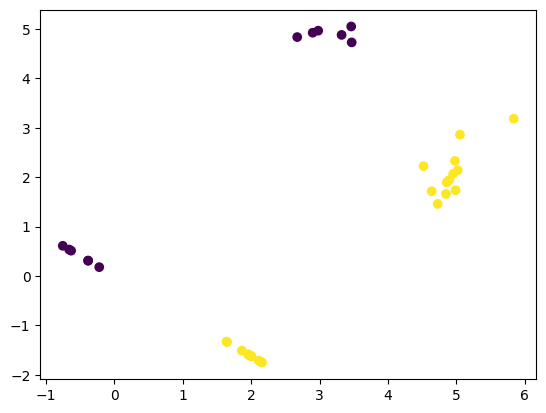

In [104]:
plt.scatter(X[:,0],X[:,1],c =y)
plt.scatter(X_t[:,0],X_t[:,1],c =y)

## 3 Classes 2 Features

In [105]:
N = [6, 12, 20]
mu = [[3, 5], [5, 2], [4,8]]
sigma = [
    [[0.1, 0.05],
     [0.05, 0.1]],
    [[0.1, 0.05],
     [0.05, 0.1]],
    [[0.1, 0.05],
     [0.05, 0.1]],
]
X, y = myML.dataGen_categorical(N, mu, sigma)

In [106]:
w = myML.LDA(X,y)[:,:1]

In [107]:
X_t = (tf.matmul(X, w) / tf.matmul(tf.transpose(w), w)) @ tf.transpose(w)

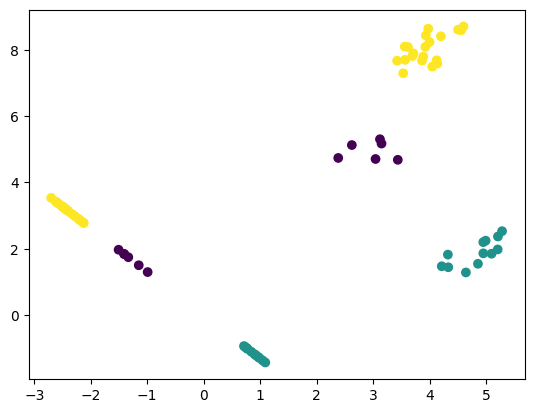

In [108]:
plt.scatter(X[:,0],X[:,1],c =y)
plt.scatter(X_t[:,0],X_t[:,1],c =y)

## Summary
1. Projection onto a line, projection matrix $P$, $p=\frac{\boldsymbol{a}\boldsymbol{a}^\top}{\boldsymbol{a}^\top\boldsymbol{a}}\boldsymbol{b} = \boldsymbol{P}\boldsymbol{b}$.
2. Projection onto a plane, projection matrix $P$, $p=\boldsymbol{A}(\boldsymbol{A}^\top \boldsymbol{A})^{-1}\boldsymbol{A}^\top\boldsymbol{b} = \boldsymbol{P}\boldsymbol{b}$